# Welcome to the Beginner Python Workshop 

### Topic: Curve Fitting

This notebook will give you a basic introduction to the Python world. Some of the topics mentioned below is also covered in the [tutorials and tutorial videos](https://github.com/GuckLab/Python-Workshops/tree/main/tutorials)

Eoghan O'Connell, Guck Division, MPL, 2021

In [1]:
# notebook metadata you can ignore!
info = {"workshop": "05",
        "topic": ["curve fitting", "plotting",
                  "csv", "iris"],
        "version" : "1.0.0"}

### How to use this notebook

- Click on a cell (each box is called a cell). Hit "shift+enter", this will run the cell!
- You can run the cells in any order!
- The output of runnable code is printed below the cell.
- Check out this [Jupyter Notebook Tutorial video](https://www.youtube.com/watch?v=HW29067qVWk).

See the help tab above for more information!


# What is in this Workshop?
In this notebook we cover:

- Curve fitting (least-squares)
   - Creating equation of a line
   - Linear fitting
   - Polynomial (n=2,3 etc)
   - Exponential


In [2]:
# import necessary modules
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

## Curve fitting (Least-squares)

We can do some curve fitting with scipy or other packages
See the non-linear least-squares curve fitting documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [3]:
df = pd.read_csv(r"../../data/iris.csv")

### Linear fit

Create a linear fitting function (n=1)...


In [4]:
def linear_fit(x, m, c):
    y = (m * x) + c
    return y

In [5]:
# get some data from our dataframe

xlab = "petallength"
ylab = "petalwidth"

x = df[xlab]
y = df[ylab]

popt, pcov = curve_fit(linear_fit, x, y)
popt2, pcov2 = curve_fit(linear_fit, x[0:50], y[0:50])

<IPython.core.display.Javascript object>


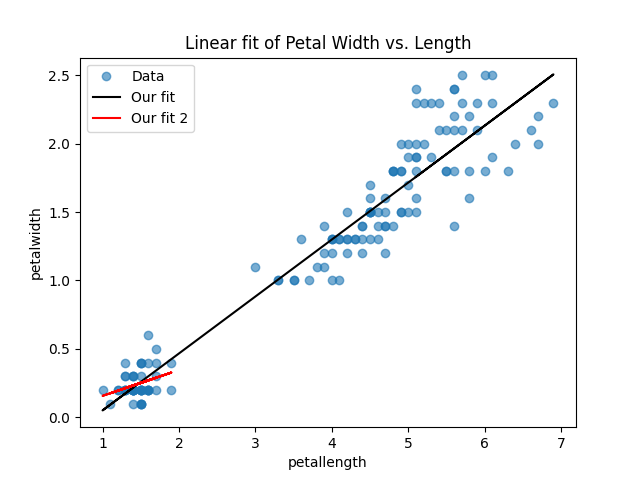

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y, linestyle="", marker="o", alpha=0.6, label='Data')
ax1.plot(x, linear_fit(x, *popt), 'k-', label='Our fit')
ax1.plot(x[0:50], linear_fit(x[0:50], *popt2), 'r-', label='Our fit 2')

ax1.set_xlabel(xlab)
ax1.set_ylabel(ylab)
ax1.set_title("Linear fit of Petal Width vs. Length")
ax1.legend()
plt.show()

### Higher Polynomial degres

What about other polynomial degrees such as n=2,3 etc...

In [7]:
def n2_fit(x, m, c, a):
    y = (a * x**2) + (m*x) + c
    return y

def n3_fit(x, m, c, a, b):
    y = (b * x**3) + (a * x**2) + (m*x) + c
    return y

xlab = "sepallength"
ylab = "petalwidth"
x = df[xlab]
y = df[ylab]

x2 = x[0:150]
y2 = y[0:150]
popt2, pcov = curve_fit(n2_fit, x2, y2)
popt3, pcov = curve_fit(n3_fit, x2, y2)

<IPython.core.display.Javascript object>


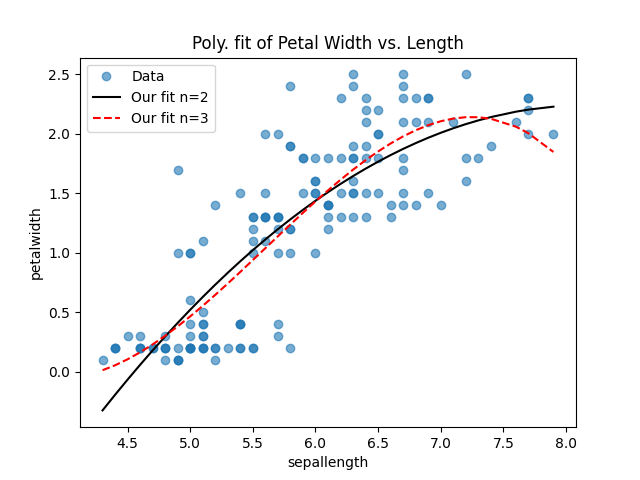

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y, linestyle="", marker="o", alpha=0.6, label='Data')
# we have to arrange the data from lowest to highest so the line displays correctly
x2_arranged = x2.sort_values()
ax1.plot(x2_arranged, n2_fit(x2_arranged, *popt2), 'k-', label='Our fit n=2')
ax1.plot(x2_arranged, n3_fit(x2_arranged, *popt3), 'r--', label='Our fit n=3')

ax1.set_xlabel(xlab)
ax1.set_ylabel(ylab)
ax1.set_title("Poly. fit of Petal Width vs. Length")
ax1.legend()
plt.show()

### Exponential fitting

Often our data follow an exponential trend...

<IPython.core.display.Javascript object>


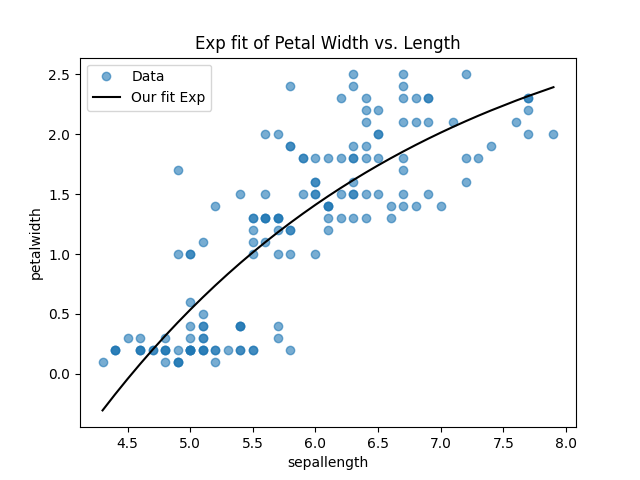

In [9]:
xlab = "sepallength"
ylab = "petalwidth"
x = df[xlab]
y = df[ylab]
x2 = x[0:150]
y2 = y[0:150]

def exp_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(exp_fit, x2, y2)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y, linestyle="", marker="o", alpha=0.6, label='Data')
# we have to arrange the data from lowest to highest so the line displays correctly
x2_arranged = x2.sort_values()
ax1.plot(x2_arranged, exp_fit(x2_arranged, *popt), 'k-', label='Our fit Exp')

ax1.set_xlabel(xlab)
ax1.set_ylabel(ylab)
ax1.set_title("Exp fit of Petal Width vs. Length")
ax1.legend()
plt.show()

### Exercises

1. Create a plot from a spreadsheet that includes a scatter plot and a curve fit
2. Add the following to the above plot:
   - Adjust the colors, markers, alpha etc. Change the fontsize of the the title and x,y labels
   - Make some custom axis ticks
   - Add a legend
   - A subfigure with a bar chart and a box plot
3. Save the plot in publication-ready resolution.
